0.0
First simulation:  COMPLETED
Output:  {'11': 263, '10': 250, '01': 226, '00': 261}
Second simulation:  COMPLETED
Output:  {'01': 226, '11': 288, '00': 241, '10': 245}


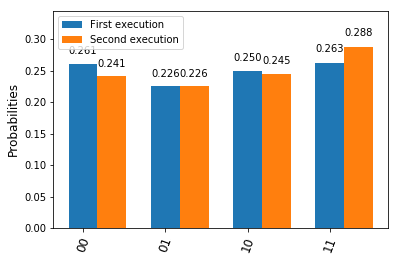

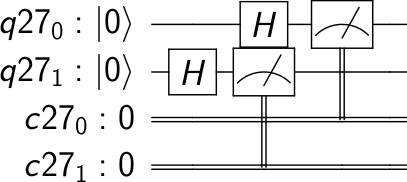

In [32]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Define the number of your qbits
n = 2
N = 2^n
O = math.sqrt(N)
print(O)
# Create a Quantum Register with N-qubits.
q = QuantumRegister(n)
# Create a Classical Register with N-bits.
c = ClassicalRegister(n)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)
# Add H-gate on qubit 0 and 1 to putting in superposition.
qc.h(q[0])
qc.h(q[1])

i = 0
# Avarage of ~O(sqrt(N)) repititions
while n < 0:
    i += 1
    # Apply the oracle
    qc.h(q[1])
    qc.cx(q[0],q[1])
    qc.h(q[1])
    # Apply grover-difiusion 
    qc.h(q[0])
    qc.h(q[1])
    
    qc.h(q[1])
    qc.x(q[0])
    qc.cx(q[0],q[1])
    qc.x(q[0])
    qc.h(q[1])
     
    qc.x(q[0])
    qc.h(q[1])
    qc.cx(q[0],q[1])
    qc.x(q[0])
    qc.h(q[1])
      
    qc.h(q[0])
    qc.x(q[1])
    qc.cx(q[1],q[0])
    qc.h(q[0])
    qc.x(q[1])
       
    qc.h(q[0])
    qc.h(q[1])
    
# Measure: qubit to bit       
qc.measure(q, c)
# Get Aer backend
backend_sim = Aer.get_backend('qasm_simulator')
# Compile and run the Quantum circuit on a simulator backend
sim_result1 = execute(qc, backend_sim, shots=1000).result()
sim_result2 = execute(qc, backend_sim, shots=1000).result()
counts1 = sim_result1.get_counts(qc)
counts2 = sim_result2.get_counts(qc)
# Show the results as text and plot
print("First simulation: ", sim_result1)
print("Output: ", counts1)
print("Second simulation: ", sim_result2)
print("Output: ", counts2)
legend = ['First execution', 'Second execution']
plot_histogram([counts1,counts2], legend=legend)
circuit_drawer(qc)

In [26]:
print(O)

0.0


Running on current least busy device:  ibmqx4
First experiment:  Successful completion
Output:  {'0x3': 66, '0x2': 771, '0x1': 42, '0x0': 121}
Second experiment:  Successful completion
Output:  {'0x3': 83, '0x2': 745, '0x1': 39, '0x0': 133}


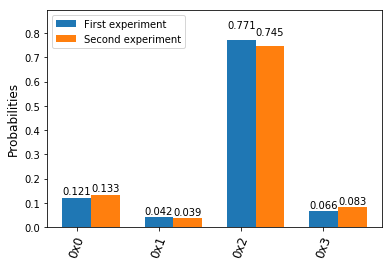

In [20]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, Aer, backends, IBMQ
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = True

# define the number of your Qbits
N = 2

try:
    # Create a Quantum-Register with N qubits / initialize N-Qbits.
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    qc = QuantumCircuit(q, c)
    
    # Create superposition
    qc.h(q[0])
    qc.h(q[1])

    n = 0
    # avarage of ~O(sqrt(N)) repititions
    while n < 1:
        # apply the oracle
        qc.h(q[1])
        qc.x(q[0])
        qc.cx(q[0],q[1])
        qc.x(q[0])
        qc.h(q[1])
        
        qc.h(q[0]);
        qc.h(q[1]);

        # grover difiusion 
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.h(q[1]);
        
        qc.x(q[0]);
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.x(q[0]);
        qc.h(q[1]);
        
        qc.h(q[0]);
        qc.x(q[1]);
        qc.cx(q[1],q[0]);
        qc.h(q[0]);
        qc.x(q[1]);
        
        qc.h(q[0]);
        qc.h(q[1]);
        
        n = n + 1

    # measure
    qc.measure(q, c)
      
        
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 1000, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 1000, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01,counts02], legend=legend, options={'label':'binary'})
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)